[![session-9](https://github.com/jorge1b3/Hands-on-Computer-Vision/blob/main/Sesiones/Sesion9/Sesion9-banner.png?raw=1)](https://github.com/semilleroCV/Hands-on-Computer-Vision/tree/main/Sesiones/Sesion9)

In [1]:
#@title **load required libraries**
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%%capture
#@title clone our repo to get data 'locally'
! git clone -n --depth=1 --filter=tree:0 \
  https://github.com/semilleroCV/Hands-on-Computer-Vision
%cd Hands-on-Computer-Vision
! git sparse-checkout set --no-cone Sesiones/Sesion9
! git checkout
%cd Sesiones/Sesion9/

# <font color="EB9A54"><center> **Hands-On Sesión 9: Black Bodies 📚🌡️** </center></font>

## <font color='#4C5FDA'> **Contenido**</font>

[**1. Ley de Stefan-Boltzmann**](#tema1)

[**2. Ley de Planck**](#tema2)

[**3. Ley de Desplazamiento de Wein**](#tema3)

[**4. Ley de Kirchoff para la emisividad**](#tema4)

[**5. Introducción a las imágenes térmicas**](#tema5)

# <font color="4C5FDA"> **Ley de Stefan-Boltzmann** </font><a name="tema1"></a>

Cuando hablamos de radiación no podemos omitir la ley de Stefan-Boltzmann, la cual nos describe la cantidad total de radiancia espectral por unidad de superficie de un **cuerpo negro** por unidad de tiempo.

La ley de Stefan-Boltzmann se expresa como:
$$
I = \sigma T^4
$$

Donde $I$ representa la radiancia espectral, $\sigma$ es la constante de Stefan-Boltzmann y por ultimo $T$ que representa la temperatura absoluta medida en grados Kelvin.


In [3]:
from scipy.constants import sigma as stefan_boltzmann  # Constante de Stefan-Boltzmann
print(f"Constante de Stefan-Boltzmann (σ): {stefan_boltzmann} W/(m²·K⁴)")

Constante de Stefan-Boltzmann (σ): 5.670374419e-08 W/(m²·K⁴)


In [4]:
# Calcula la cantidad total de radiancia espectral por unidad de superficie de un cuerpo negro por unidad de tiempo.

ley_stefan_boltmann = lambda T: stefan_boltzmann * T**4 # unidades: (W/m^2)

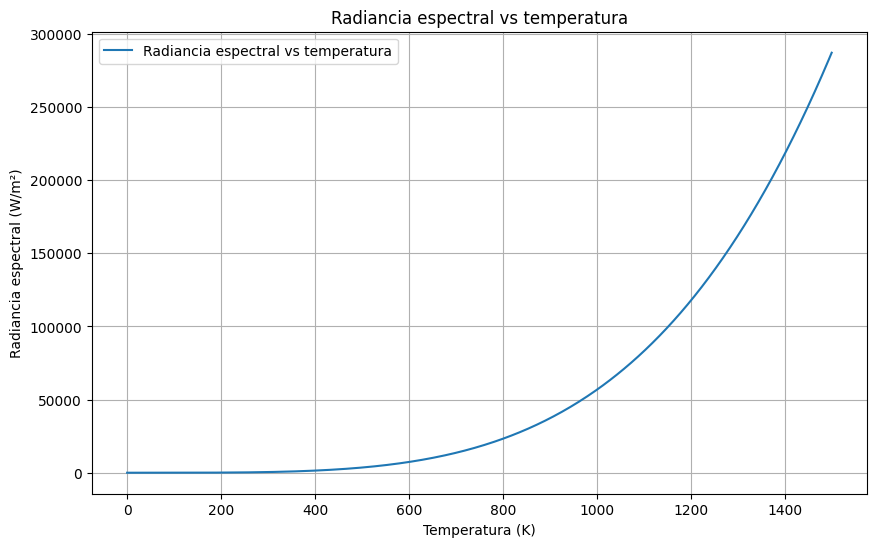

In [5]:
temperatura = np.linspace(0, 1500, 500) # unidades: kelvin

# print(temperatura)

intensidad_espectral = ley_stefan_boltmann(temperatura)

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(temperatura, intensidad_espectral, label='Radiancia espectral vs temperatura')

plt.title('Radiancia espectral vs temperatura')
plt.xlabel('Temperatura (K)')
plt.ylabel('Radiancia espectral (W/m²)')
plt.grid(True)
plt.legend()
plt.show()

## <font color="#016008"> **Pasos para obtener la constante de Stefan-Boltzmann** </font>


1. **Integrar la función de Planck**: A la hora de integrar la función debemos hacerlo respecto a la longitud de onda y a lo largo de todo el espectro electromagnetico (De cero a infinito).

$$ I = \int_0^\infty \frac{2h{c}^2}{{\lambda}^5(e^{\frac{hc}{\lambda {k_B} T}}-1)} d\lambda $$

Donde:

- $h$ es la constante de Planck.
- $λ$ es la longitud de onda.
- $c$ es la velocidad de la luz en el vacío.
- $k_B$ es la constante de Boltzmann (es diferente a la constante de Stefan-Boltzmann).
- T es la temperatura del cuerpo negro.

2. **Utilizar la sustitución $ u = \frac{{hc}}{{\lambda k_BT}} $.** La integral que obtenemos a partir de esta sustitución es la siguiente:
$$ I = \frac{2 (k_B T)^4}{h^3c^2} \int_0^\infty \frac{u^3}{e^u -1} du $$

3. **Usar el hecho de que $\int_0^\infty \frac{u^3}{e^u -1} du = \frac{\pi^4}{15}$** (ya alguien lo hizo antes). Si utilizamos el hecho anterior obtendriamos que la potencia irradiada por unidad de area seria la siguiente:
$$ I = \frac{2 (k_B)^4}{h^3c^2} \cdot T^4 \cdot \frac{\pi^4}{15} = \frac{2 (k_B \pi)^4}{15h^3c^2} \cdot T^4 = \sigma T^4$$
Probando así la Ley de Stephan-Boltzmann.

# <font color="4C5FDA"> **Ley de Planck** </font><a name="tema2"></a>
La Ley de Planck describe cómo la cantidad de radiación electromagnética emitida por un cuerpo negro varía con la longitud de onda a una temperatura dada. Se expresa como:

$$ B(\lambda, T) = \frac{2hc^2}{\lambda^5} \cdot \frac{1}{e^{\frac{hc}{\lambda k_B T}} - 1} $$

Donde:

- B(λ,T) es la radiancia espectral a una longitud de onda λ y temperatura T.
- $h$ es la constante de Planck.
- $λ$ es la longitud de onda de la radiación.
- $c$ es la velocidad de la luz en el vacío.
- $k_B$ es la constante de Boltzmann (es diferente a la constante de Stefan-Boltzmann).
- T es la temperatura del cuerpo negro.


In [6]:
from scipy.constants import h, c, k

# h: Constante de Planck
# c: Velocidad de la luz en el vacío
# k: Constante de Boltzmann

print(f"Constante de Planck (h): {h} J·s")
print(f"Velocidad de la luz (c): {c} m/s")
print(f"Constante de Boltzmann (k): {k} J/K")

Constante de Planck (h): 6.62607015e-34 J·s
Velocidad de la luz (c): 299792458.0 m/s
Constante de Boltzmann (k): 1.380649e-23 J/K


In [7]:
def ley_planck(longitudOnda, temperatura:float):
    """
    Calcula la densidad espectral de energía de la radiación de cuerpo negro
    según la Ley de Planck.

    :param longitudOnda: Longitud de onda en metros.
    :param temperatura: Temperatura absoluta en Kelvin.
    :return: Densidad espectral de energía (W/m² m).
    """

    exponent = (h * c) / (longitudOnda * k * temperatura)

    return (2 * h * c**2) / (longitudOnda**5) * (1 / (np.exp(exponent) - 1))

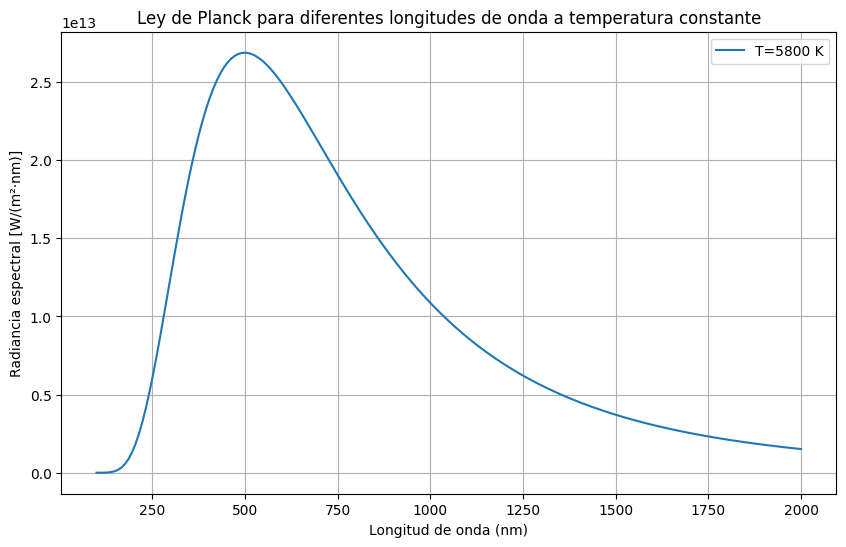

In [8]:
# Crear un array de longitudes de onda desde 100 nm hasta 2000 nm
longitudOnda = np.linspace(100e-9, 2000e-9, 200)  # en metros

# Temperatura constante (por ejemplo, similar a la del sol)
temperatura = 5800  # en Kelvin

# Calcular la intensidad para cada longitud de onda
intensidad = ley_planck(longitudOnda, temperatura)

# Graficar la Ley de Planck para una temperatura constante
plt.figure(figsize=(10, 6))
# Se multiplica por 1e9 para convertir la longitud de onda a nm
plt.plot(longitudOnda * 1e9, intensidad, label=f'T={temperatura} K')
plt.title('Ley de Planck para diferentes longitudes de onda a temperatura constante')
plt.xlabel('Longitud de onda (nm)')
plt.ylabel('Radiancia espectral [W/(m²·nm)]')
plt.legend()
plt.grid(True)
plt.show()

## <font color='#ECA702'>**<font color="#FF0000">R</font><font color="#FF7F00">e</font><font color="#FFFF00">t</font><font color="#00FF00">o</font> #<font color="#0000FF">1</font>** 💪</font>

Cambia las longitudes de onda y temperaturas como gustes. ¿Qué pasa con las intensidades en el espectro visible a bajas temperaturas?

**Nota**: Asuma que el espectro visible va desde 350nm hasta 750nm.

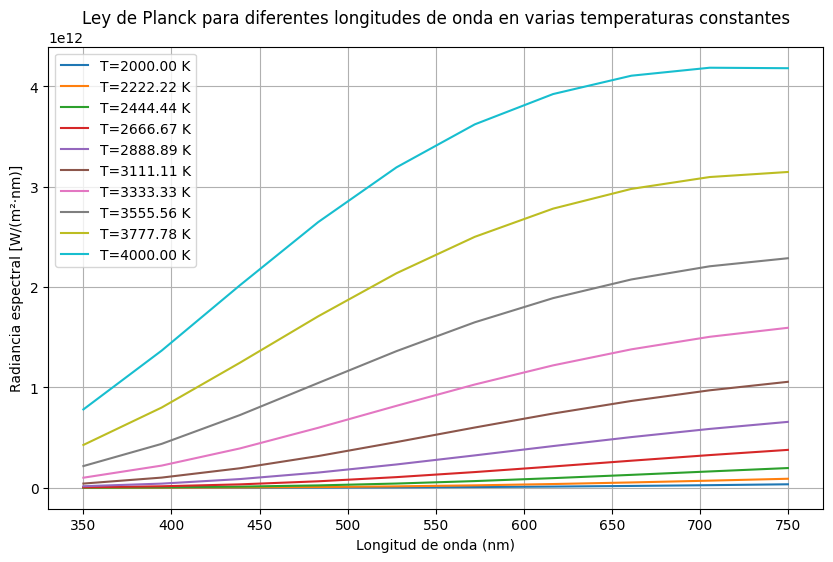

In [34]:
# Crear un array de longitudes de onda
longitudOnda = np.linspace(3.5e-7, 7.5e-7, 10) # en metros

# Crear un array de temperaturas
temperatura = np.linspace(2000, 4000, 10) # en Kelvin

plt.figure(figsize=(10, 6))
plt.title('Ley de Planck para diferentes longitudes de onda en varias temperaturas constantes')
plt.xlabel('Longitud de onda (nm)')
plt.ylabel('Radiancia espectral [W/(m²·nm)]')
plt.grid(True)

for t in temperatura:
  # Calcular la intensidad para cada longitud de onda
  intensidad = ley_planck(longitudOnda, t)
  plt.plot(longitudOnda * 1e9, intensidad, label= f'T={t:.2f} K')

plt.legend()
plt.show()

# <font color="4C5FDA"> **Ley de Desplazamiento de Wein** </font><a name="tema3"></a>

La ley de Wein describe la relación entre la temperatura de un cuerpo negro y la longitud de onda donde este emite su máxima radiación.

La ley de Wein se describe de la siguiente manera:
$$ \lambda_{max} = \frac{b}{T} $$
Donde $\lambda_{max}$ es la longitud de onda donde el cuerpo negro emite su máxima radiación, $b$ es la constante de Wein y $T$ es la temperatura absoluta en grados Kelvin.

In [27]:
from scipy.constants import Wien as b
print(f"Constante de Wien: {b} m·K")

Constante de Wien: 0.002897771955 m·K


In [28]:
ley_wein = lambda T: b / T # Calcula la longitud de onda donde se presenta la máxima intensidad espectral

## <font color='#ECA702'>**<font color="#FF0000">R</font><font color="#FF7F00">e</font><font color="#FFFF00">t</font><font color="#00FF00">o</font> #<font color="#0000FF">2</font>** 💪</font>   

Cambie las longitudes de onda y las temperaturas a placer. Esta vez, con la intensión de probar la ley de Wien.

**Nota**: Para hacer esto debemos guardar la intensidad maxima en un vector, y luego usando la función inmediatamente anterior para generar los valores de lambda donde se encuentran.

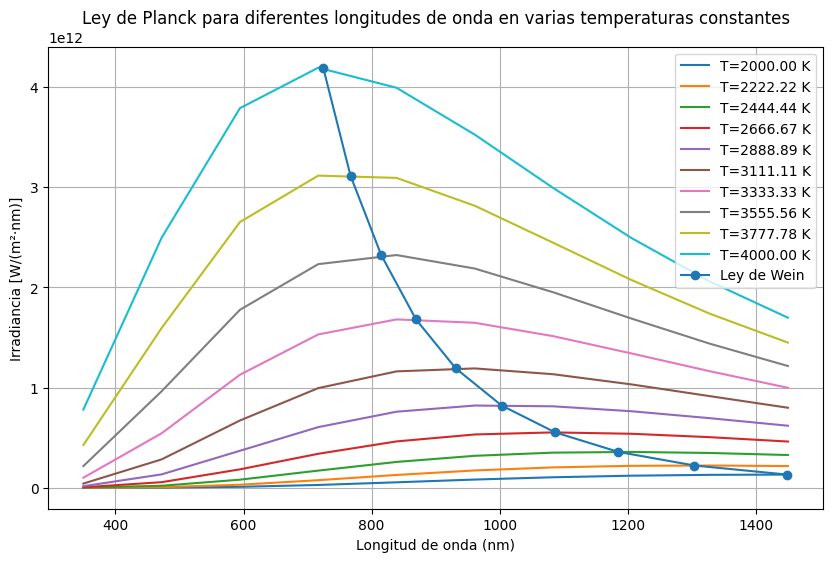

In [46]:
n = 10
# Crear un array de longitudes de onda
longitudOnda = np.linspace(3.5e-7, 14.5e-7, n) # en metros

# Crear un array de temperaturas
temperatura = np.linspace(2000, 4000, n) # en Kelvin

# Vector que guardará los maximos de intensidad
max_intensidad = []

plt.figure(figsize=(10, 6))
plt.title('Ley de Planck para diferentes longitudes de onda en varias temperaturas constantes')
plt.xlabel('Longitud de onda (nm)')
plt.ylabel('Irradiancia [W/(m²·nm)]')
plt.grid(True)

for t in temperatura:
  # Calcular la intensidad para cada longitud de onda
  intensidad = ley_planck(longitudOnda, t)
  max_intensidad.append(intensidad.max()) #Guardar los máximos de intensidad
  plt.plot(longitudOnda*1e9, intensidad, label= f'T={t:.2f} K')

lambda_max = ley_wein(temperatura)
plt.plot(lambda_max*1e9, max_intensidad, label= f'Ley de Wein', marker='o')
plt.legend()
plt.show()

## <font color="#016008"> **Pasos para derivar la Ley de Wien** </font>

1. **Maximizar la función de Planck**:
   Para encontrar el pico de la función de Planck $ B(\lambda, T) = \frac{2hc^2}{\lambda^5} \cdot \frac{1}{e^{\frac{hc}{\lambda k_B T}} - 1} $, derivamos $ B(\lambda, T) $ con respecto a $ \lambda $ y luego igualamos a cero para encontrar los puntos críticos.

2. **Derivada de la función de Planck**:
   La derivada de la función de Planck con respecto a $ \lambda $ es complicada, pero al realizar la derivación y simplificación obtenemos:

   $$ \frac{dB(\lambda, T)}{d\lambda} = \frac{2hc^2}{\lambda^6} \left( \frac{ \frac{hc}{\lambda k_B T}e^{\frac{hc}{\lambda k_B T}}-5(e^{\frac{hc}{\lambda k_B T}}-1)}{(e^{\frac{hc}{\lambda k_B T}}-1)^2}\right)  $$


3. **Igualar la derivada a cero para encontrar el máximo**:
   Al igual la derivada a cero obtenemos la siguiente expresión:

   $$ \frac{hc}{\lambda k_BT} \cdot \frac{e^{\frac{hc}{\lambda k_BT}}}{e^{\frac{hc}{\lambda k_BT}}-1} - 5 = 0 $$

4. **Realizamos un cambio de variable y resolvemos numericamente la ecuación**:
   A modo de poder resolver la ecuación de manera numerica realizamos un cambio de varaible $ u = \frac{hc}{\lambda k_B T}$ obteniendo así la siguiente expresión:

   $$ u \cdot \frac{e^u}{e^u-1} - 5 = 0 $$

   Alguien ya lo hizo antes y le dió u = 4.9651

5. **Nos devolvemos**:
   Una vez obtenido el valor de $u$ despejamos $\lambda$ que en este caso serían $\lambda_{max} $ y con eso obtendriamos la siguiente expresión.
   $$\lambda_{max}  = \frac{hc}{k_BTu} = \frac{2897.8}{T} \mu m K$$

  Probando así la Ley de Wein.

# <font color="4C5FDA"> **Ley de Kirchoff para la emisividad** </font><a name="tema4"></a>


La Ley de Kirchoff establece que la **emisividad** de un material a cierta temperatura y en cierta **longitud de onda $\lambda$** será igual a la **absorptividad** de este cuando se encuentre en equilibrio térmico.
$$ \epsilon(\lambda, T) = \alpha(\lambda, T)$$
La **emisividad $\epsilon$** es la radiación emitida por una superficie comparada con la radiación emitida por un cuerpo negro. La **absorptividad $\alpha$** es la radiación absorbida por una superficie comparada con la radiación absorbida por un cuerpo negro. Cabe aclarar que los cuerpos de la vida real no solo **absorben** y **emiten** radiación; algunos también la **transmiten**, como es el caso de materiales transparentes.

<p align="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/9/9b/Human-Visible.jpg" alt="Visible Spectrum" height="300px" />
  <img src="https://upload.wikimedia.org/wikipedia/commons/4/44/Human-Infrared.jpg" alt="Infrared Spectrum" height="300px" />
</p>

En cambio, los vidrios **transmiten** muy poca radiación en el infrarrojo porque la **absorben**, **emitiendo** así muy poca radiación (por eso las gafas se ven 'oscuras').

# <font color="4C5FDA"> **Introducción a las imágenes térmicas** </font><a name="tema5"></a>

- Todos los objetos emiten radiación termica.
- Una cámara infrarroja detecta y captura la energía infrarroja de los objetos. La cámara convierte la energía infrarroja en una imagen visible y detecta el calor de la superficie que observa.


## **¿Qué es una imagen infrarroja o termica?**
Una imagen infrarroja es una imagen que se formó captando luz que poseía una longitud de onda entre [760 nm - 1.000.000 nm].

<div align=center><img src = 'https://www.pulsar-nv.com/data/public/uploads/2020/06/spektralnyi-diapazon.png' height='500'></div>

## **¿Qué es NIR, SWIR, MWIR, LWIR, y FIR?**
- **NIR (Near Infrared)** Luz que posee una longitud de onda entre 780 nm - 1000 nm.

- **SWIR (Short Wave Infrared)** Luz que posee una longitud de onda entre 1000 nm - 3000 nm.

- **MWIR (Mid Wave Infrared)** Luz que posee una longitud de onda entre 3000 nm - 8000 nm.

- **LWIR (Long Wave Infrared)** Luz que posee una longitud de onda entre 8000 nm - 14000 nm.

- **FIR (Far Infrared)** Luz que posee una longitud de onda entre 14000 nm - 1.000.000 nm.

## <font color='#ECA702'>**<font color="#FF0000">R</font><font color="#FF7F00">e</font><font color="#FFFF00">t</font><font color="#00FF00">o</font> #<font color="#0000FF">3</font>** 💪</font>   

Carga la imagen infrarroja que quieras o usa una de las disponibles y saca tus conclusiones.

In [40]:
gray_image = cv2.imread("images/Img6.jpg", cv2.IMREAD_GRAYSCALE)

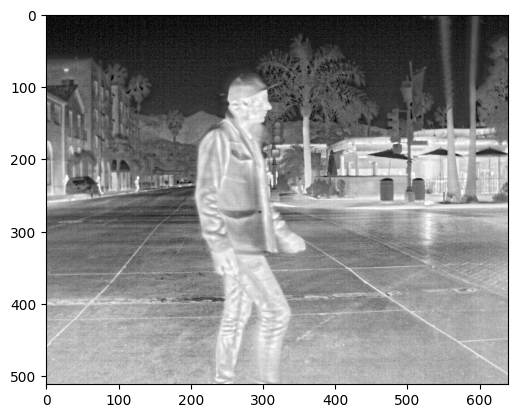

In [41]:
plt.imshow(gray_image, cmap='gray')
plt.show()

Las imágenes térmicas son medidas fuera del espectro visible por lo tanto, si queremos representarlas tenemos que 'colorearlas'.

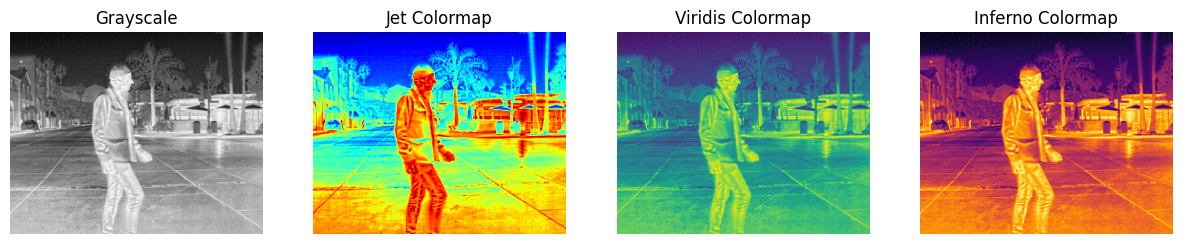

In [42]:
plt.figure(figsize=(15, 5))

plt.subplot(141)
plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale')
plt.axis('off')

plt.subplot(142)
plt.imshow(gray_image, cmap='jet')
plt.title('Jet Colormap')
plt.axis('off')

plt.subplot(143)
plt.imshow(gray_image, cmap='viridis')
plt.title('Viridis Colormap')
plt.axis('off')

plt.subplot(144)
plt.imshow(gray_image, cmap='inferno')
plt.title('Inferno Colormap')
plt.axis('off')

plt.show()